In [1]:
from dask_image.imread import imread
from dask.distributed import Client 
import matplotlib.pyplot as plt

In [15]:
# connecting to dask scheduler
#client = Client("tcp://172.31.31.30:8786")
print("dashboard link : ",client.dashboard_link)

dashboard link :  http://172.31.31.30:8787/status


/home/ubuntu/ashu-env/lib/python3.12/site-packages/distributed/client.py:1612: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | Client | Scheduler | Workers |
+---------+--------+-----------+---------+
| numpy   | 2.1.3  | 2.2.4     | 2.2.4   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [6]:
#reading image 
dog_image = imread('../dog1.jpg')
# squeez image layer if we are having just a single layer 
dog_image1 = dog_image.squeeze(axis=0)

In [7]:
# printing shape of given image
print(f"image shape: {dog_image1.shape}")


image shape: (3888, 5184, 3)


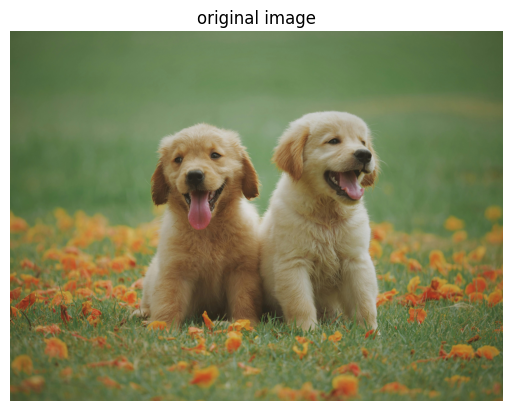

In [8]:
# to display original image lets use matplotlib 
plt.title("original image")
plt.imshow(dog_image1)
plt.axis('off')  # Hide axes
plt.show()

In [9]:
chunk_size = (1400, 1400, 3)  # 256x256 pixels with 3 color channels

# Split the image into smaller chunks

chunks = [
    dog_image1[i:i + chunk_size[0], j:j + chunk_size[1]]
    for i in range(0, dog_image1.shape[0], chunk_size[0])
    for j in range(0, dog_image1.shape[1], chunk_size[1])
]

# Check the number of chunks created
print(f"Number of chunks: {len(chunks)}")

Number of chunks: 12


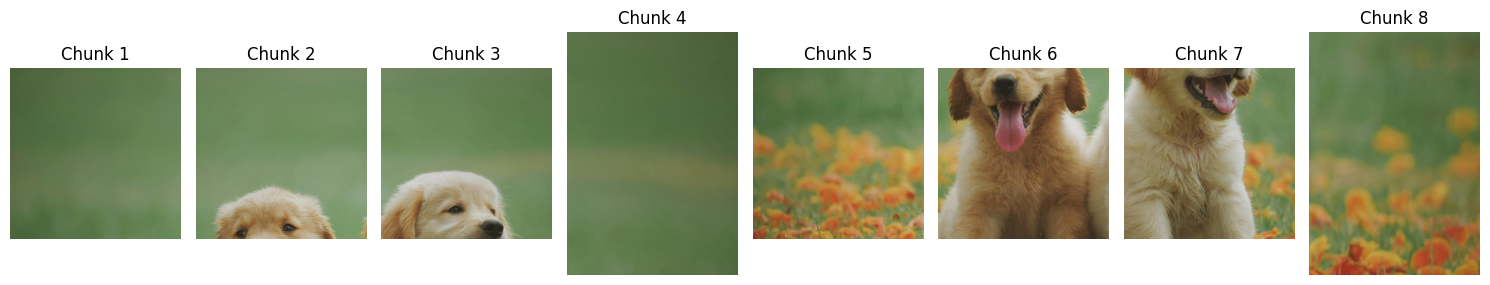

In [10]:
# lets display few chunks 
# Display the first few chunks
num_chunks_to_display = 8 # Number of chunks to display
fig, axes = plt.subplots(1, num_chunks_to_display, figsize=(15, 5))

for idx, ax in enumerate(axes):
    chunk = chunks[idx].compute()  # Convert Dask array to NumPy array
    ax.imshow(chunk)
    ax.axis('off')  # Hide axes
    ax.set_title(f'Chunk {idx + 1}')

plt.tight_layout()
plt.show()